# First Iteration of Modelling

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn Libraries
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report

In [2]:
# Read in the data set
data = pd.read_pickle('./dataset/data.pkl')

In [3]:
# Preview a sample of the data
data.sample(10)

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,hospital_death,Asian,Caucasian,...,M,readmit,transfer,CSICU,CTICU,Cardiac ICU,MICU,Med-Surg ICU,Neuro ICU,SICU
29610,82.0,27.301463,0,182.88,0.506250,0,91.31,0,0,1,...,1,0,0,0,0,0,0,0,1,0
30133,87.0,26.863455,0,149.86,5.456250,0,60.33,0,0,1,...,0,0,0,0,0,0,0,1,0,0
41937,56.0,24.538597,0,170.10,0.992361,0,71.00,0,0,1,...,1,0,0,0,0,0,0,0,0,1
79666,70.0,38.391891,1,147.30,1.295833,0,83.30,0,0,1,...,0,0,1,0,0,0,0,1,0,0
33583,50.0,25.707702,0,175.30,0.116667,0,79.00,0,0,0,...,1,0,0,0,0,0,0,1,0,0
15986,75.0,28.844953,1,155.00,3.500694,0,69.30,0,0,1,...,0,0,0,1,0,0,0,0,0,0
48917,33.0,29.257812,0,160.00,1.443750,0,74.90,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12267,88.0,20.327692,0,167.60,0.248611,0,57.10,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5700,29.0,20.589339,0,195.59,0.002083,0,80.80,0,0,1,...,1,0,0,0,0,0,0,1,0,0
63251,62.0,27.294729,0,165.10,0.279861,0,74.40,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [4]:
# Statistical summary of the data
print(data.describe())

                age           bmi  elective_surgery        height  \
count  82965.000000  82965.000000      82965.000000  82965.000000   
mean      62.355897     29.358953          0.188706    169.842772   
std       16.751005      8.315228          0.391277     10.742360   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.768204          0.000000    162.600000   
50%       65.000000     27.844601          0.000000    170.100000   
75%       75.000000     33.145212          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

       pre_icu_los_days  readmission_status        weight  hospital_death  \
count      82965.000000             82965.0  82965.000000    82965.000000   
mean           0.854556                 0.0     84.682666        0.082625   
std            2.528387                 0.0     25.065473        0.275317   
min           -0.244444                 0.0     38.600000        0.000

In [5]:
# Set up dependent and independent variables
X = data.drop(columns = 'hospital_death', axis = 1)
y = data['hospital_death']

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify = y)

In [7]:
# Shape of the training set
print("X_train has ", X_train.shape[0], " rows and ", X_train.shape[1], " columns.")

X_train has  58075  rows and  22  columns.


In [8]:
# Shape of testing set
print("X_test has ", X_test.shape[0], " rows and ", X_test.shape[1], " columns.")

X_test has  24890  rows and  22  columns.


### Baseline Model

In [9]:
# Baseline model
dummy_clf = DummyClassifier()

In [10]:
# Fit dummy classifier of training set
dummy_clf.fit(X_train, y_train)

/Users/oghenevwedeagboro-jimoh/anaconda3/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier()

### Dummy Classifier Evaluation

In [11]:
# Score dummy classifier on test set
dummy_clf.score(X_test, y_test)

0.8501406187223784

In [12]:
# Making predictions on test set
dummy_preds = dummy_clf.predict(X_test)

In [13]:
# Classification Report
print(classification_report(y_test, dummy_preds))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     22833
           1       0.07      0.07      0.07      2057

    accuracy                           0.85     24890
   macro avg       0.49      0.49      0.49     24890
weighted avg       0.85      0.85      0.85     24890



In [14]:
# roc_auc_score
dummy_auc = roc_auc_score(y_test, dummy_preds)
print('AUC: %.2f' % dummy_auc)

AUC: 0.49


## Other Algorithms

### LogisticRegression

In [15]:
# Instantiate the LogisticRegression
lr = LogisticRegression(solver = 'liblinear')

In [16]:
# fit on training set
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [17]:
# Score on the test set
lr.score(X_test, y_test)

0.9169144234632383

In [18]:
# Predictions on X_test
lr_preds = lr.predict(X_test)

In [19]:
# lr Classification report
print(classification_report(y_test,lr_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22833
           1       0.13      0.00      0.00      2057

    accuracy                           0.92     24890
   macro avg       0.53      0.50      0.48     24890
weighted avg       0.85      0.92      0.88     24890



In [20]:
# roc_auc_score
lr_auc = roc_auc_score(y_test, lr_preds)
print('AUC: %.2f' % lr_auc)

AUC: 0.50


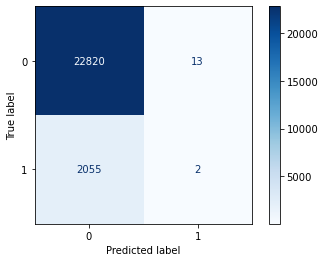

In [21]:
# Confusion matrix
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

### Decision Tree Classifier

In [22]:
# Instantiate the dtc estimator
dtc = DecisionTreeClassifier()

In [23]:
# fit on the training set
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# Score the model
dtc.score(X_test, y_test)

0.840980313378867

In [25]:
# Predictions on X_test
dtc_preds = dtc.predict(X_test)

In [26]:
# Classification report
print(classification_report(y_test, dtc_preds))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     22833
           1       0.10      0.11      0.10      2057

    accuracy                           0.84     24890
   macro avg       0.51      0.51      0.51     24890
weighted avg       0.85      0.84      0.85     24890



In [27]:
# roc_auc_score
dtc_auc = roc_auc_score(y_test, dtc_preds)
print('AUC: %.2f' % dtc_auc)

AUC: 0.51


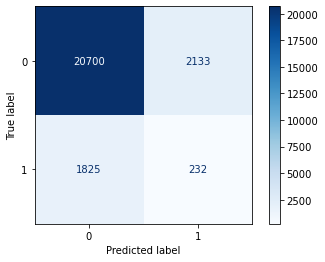

In [28]:
# Confusion matrix
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues')

### K-Nearest Neighbors (KNN)

In [29]:
# Instantiate the model
knn = KNeighborsClassifier()

In [30]:
# Instantiate the Scaler
scaler = StandardScaler()

In [31]:
# Scale the data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [32]:
# Fit the scaled data
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier()

In [33]:
# Prediction on X_test
knn_preds = knn.predict(scaled_X_test)

In [37]:
knn.score(scaled_X_test, y_test)

0.911329851345922

In [34]:
# Classification report
print(classification_report(y_test, knn_preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     22833
           1       0.17      0.02      0.03      2057

    accuracy                           0.91     24890
   macro avg       0.55      0.51      0.49     24890
weighted avg       0.86      0.91      0.88     24890



In [36]:
# roc_auc_score
knn_auc = roc_auc_score(y_test, knn_preds)
print('AUC: %.2f' % knn_auc)

AUC: 0.51


### Conclusion

The baseline model scored 85% on the test sets which isn't too far off from the scores of the other models: Logistic Regression, Decision Tree Classifier and the K-NN which scored ~91, ~84 and ~91 respectively. However, in using the AUC to evealuate the models, they perforemed just as poorly as the baseline model with an average ROC AUC Score of 0.51!. I will have to do some advanced feature engineering in other notebooks to see if I can improve on the model's performance.